<div style="border:solid purple 2px; padding: 20px">

Привет Сергей! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указывать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечены <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

---

Сергей, классная работа! Код чистый, структурированный, понятный. По всей работе прослеживается логика принятий решений. В работе нет критических замечаний и ее можно было сразу же принять, но я отправлю проект на доработку, чтобы ты смог просмотреть мои комментарии (зеленые и оранжевые), попробовать что-то реализовать, и может, задать мне вопросы. Если сейчас ты пока не готов просмотреть материал, напиши мне об этом и я сразу же приму твой проект)

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добрый день, Рустам! Огромное спасибо за советы и комментарии, отдельный 👍 за картинки)))
    
Постарался исправить все. 
    
Есть вопрос в п. 6.2 ...нужно построить диаграммы рассеивания между всеми числовыми признаками файла? 
Это 13*12 = 156 графиков)ю В модели регрессии в прошлом проекте, диаграммы рассеивания мы строили для целевого (числовой ) и остальных числовых признаков, а здесь целевой бинарный? Или я не правильно понял...?
    
 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо за быструю и качественную доработку комментариев! Я просмотрел твои доработки, там все здорово и корректно, по твоему вопросу добавил комментарий, плюс с plotly привел пример)
    
Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории.

**Цель исследования:**

Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Ход исследования:**

Данные получим из файлов:  train_job_satisfaction_rate.csv, market_money, market_time, money

О качестве данных ничего не известно. Поэтому перед тем, как приступить к целям исследования, понадобится обзор данных и проверка их на ошибки и пропуски.

Мое исследование пройдет по следующим этапам:

- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение таблиц
- Коррялиционный анализ
- Использование пайплайнов для обучения модели 
- Анализ важности признаков модели
- Сегментация покупателей
- Итоговые выводы

## Загрузка данных

### Ипортируем необходимые библиотеки:

In [1]:
!pip install phik
!pip install optuna
!pip install shap 

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Второй импорт, кажется, лишним)))

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Да, просмотрел) Удалил лишнее.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import seaborn as sns
import phik
import shap

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.metrics import RocCurveDisplay, roc_auc_score, f1_score, mean_absolute_error, r2_score, mean_squared_error,mean_absolute_error, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from optuna.integration import OptunaSearchCV

from phik import phik_matrix
from phik.report import plot_correlation_matrix


### Откроем файлы:

In [3]:
try:
    market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
    market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
    market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', sep=',', decimal='.')
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', sep=',', decimal='.')
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', sep=',', decimal='.')
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')
pd.set_option('display.max_columns', None)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Здорово, что ты используешь конструкцию `try-except`, это повышает отказоустойчивость кода

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

За decimal в `money` отдельный плюс)

### Выведем первые строки каждого набора данных.

In [4]:
market_file.head(5)

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [5]:
market_money.head(5)

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [6]:
market_time.head(5)

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [7]:
money.head(5)

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

1.2 Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.

## Предобработка данных

### Проверим названия столбцов:

In [8]:
df_list = [market_file, market_money, market_time, money]
for df in (df_list):
    print(df.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')
Index(['id', 'Период', 'Выручка'], dtype='object')
Index(['id', 'Период', 'минут'], dtype='object')
Index(['id', 'Прибыль'], dtype='object')


**Вывод:**
- названия столбцов нужно перевести в нижний регистр
- пробелы между словами в наименованиях столбцов необходимо заменить на нижнее подчеркивание

#### Переведем названия столбцов в нижний регистр:

In [9]:
for df in df_list:
    df.columns = df.columns.str.lower()
    print(df.columns)

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


#### Заменим пробелы:

In [10]:
for col in market_file.columns:
        col_rename = col.strip().split(" ")
        col_rename = ("_").join(col_rename)
        market_file = market_file.rename(columns={col: col_rename})

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, супер, кстати, здесь можно было обойтись обычным `replace`

In [11]:
market_file.head(5)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

### Проверим типы данных в каждом датафрейме.

In [12]:
df_list = [market_file, market_money, market_time, money]
for df in df_list:
    df.info()
    print('-' * 65)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

**Вывод:**

- данные в корректном формате
- пропусков нет.

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Почему бы не вывести info через цмкл по списку датафреймов)

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Исправил.

**Вывод:**

- данные в корректном формате
- пропусков нет.

### Проверим дубликаты в датафреймах.

#### Проверим явные дубликаты в каждом датафрейме.

In [13]:
df = [market_file, market_money, market_time, money]
df_name = ['market_file', 'market_money', 'market_time', 'money']
k=0
for i in (df):
    print(f'В датафрейме "{df_name[k]}" кол-во дубликатов: {i.duplicated().sum()}')
    k+=1

В датафрейме "market_file" кол-во дубликатов: 0
В датафрейме "market_money" кол-во дубликатов: 0
В датафрейме "market_time" кол-во дубликатов: 0
В датафрейме "money" кол-во дубликатов: 0


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, полных дубликатов нет, но я бы посмотрел по `id` все ли записи уникальные и относятся к разным пользователям, или есть какие-то артефакты...

**Вывод:**

- явных дубликатов нет

#### Проверим датафреймы на неявные дубликаты

##### Проверим датафрейм market_file

In [14]:
market_file.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [15]:
def check_implicit_duplicate (df, df_col):
    for i in df_col:
        print(f'Уникальные значения столбца {i}: {df[i].sort_values().unique()}')

In [16]:
df_col = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория'] 
check_implicit_duplicate(market_file, df_col)

Уникальные значения столбца покупательская_активность: ['Прежний уровень' 'Снизилась']
Уникальные значения столбца тип_сервиса: ['премиум' 'стандарт' 'стандартт']
Уникальные значения столбца разрешить_сообщать: ['да' 'нет']
Уникальные значения столбца популярная_категория: ['Домашний текстиль' 'Косметика и аксесуары' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника' 'Техника для красоты и здоровья'
 'Товары для детей']


**Вывод:**

  - столбце "тип_сервиса" есть не явные дубликаты
  - переведем значения в нижний  регистр

##### Заменим неявные дубликаты

In [17]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

##### Переведем данные в нижний регистр 

In [18]:
col_list = ['покупательская_активность', 'популярная_категория' ]
for col in col_list:
    market_file[col] = market_file[col].str.lower()

In [19]:
market_file.head(5)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 снизилась     премиум                 да   
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     товары для детей                                    6   
1     товары для детей                                    4   
2    домашний текстиль                                    5   
3     товары для детей                                    5   
4     товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

##### Проверим датафрейм market_money

In [20]:
market_money.head()

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [21]:
df_col = ['период'] 
check_implicit_duplicate(market_money, df_col)

Уникальные значения столбца период: ['предыдущий_месяц' 'препредыдущий_месяц' 'текущий_месяц']


In [22]:
market_money[market_money['id'] == 215349]

id               период  выручка
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0

**Вывод:**

  - дубликатов нет.

##### Проверим датафрейм market_time

In [23]:
market_time.head()

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [24]:
df_col = ['период'] 
check_implicit_duplicate(market_time, df_col)

Уникальные значения столбца период: ['предыдцщий_месяц' 'текущий_месяц']


**Вывод:**

  - ошибка в наименовании 'предыдцщий_месяц'

##### Заменим некорректное наименование

In [25]:
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Здесь все круто, идем дальше

#### Проверим датафреймы на пропуски

In [26]:
for i in df_list:
    print(i.isna().sum(), '\n')

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64 

id         0
период     0
выручка    0
dtype: int64 

id        0
период    0
минут     0
dtype: int64 

id         0
прибыль    0
dtype: int64 



<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

На пропуски можно было посмотреть визуально. Для этого я использовал бы библиотеку [seaborn](https://seaborn.pydata.org/), а сам код выглядел бы как-то так
    
```python
import seaborn as sns
sns.heatmap(banks_data.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");
```

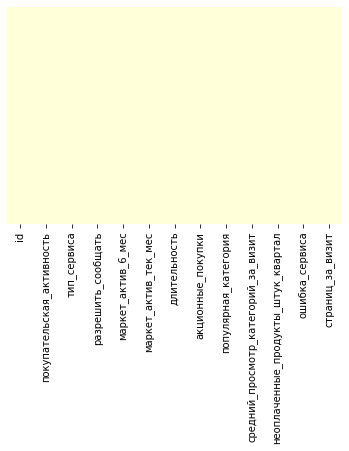

In [27]:
sns.heatmap(market_file.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>
🔥🔥🔥🔥🔥🔥

**Вывод:**
    
- пропусков нет

## Исследовательский анализ данных

Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага. df = [market_file, market_money, market_time, money]

### Проведем анализ количественных признаков файла market_file

In [28]:
market_file.head(1)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 снизилась     премиум                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121                0.0   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     товары для детей                                    6   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5

#### Построим гистограмму и boxplot для столбца "маркет_актив_6_мес" (среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента)

In [29]:
def box_hist(df, column, hue):
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [0.5, 3]})
    sns.boxplot(x=df[column], ax=axs[0], palette="pastel")
    sns.histplot(data=df, x=column, hue=hue, ax=axs[1], bins=30, multiple="stack", palette=["#F08080", "#3CB371"])
    axs[0].set_xlabel(None)
    axs[0].set_title('Гистограмма и Boxplot')
    plt.show()
    print(df[column].describe())

In [30]:
box_hist(market_file, 'маркет_актив_6_мес', 'покупательская_активность')

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Эти два графика я бы расположил друг под другом, при этом удачное решение расположить боксплот горизонтально, тогда графики будут друг под другом, и у них как бы будет единая ось икс
    
</div>

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Исправил. Так гораздо информативнее! Спасибо!

**Вывод:**

- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют

#### Построим гистограмму и boxplot для столбца маркет_актив_тек_мес (количество маркетинговых коммуникаций в текущем месяце)

In [31]:
box_hist(market_file, 'маркет_актив_тек_мес', 'покупательская_активность')

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


**Вывод:**

- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют

#### Построим гистограмму и boxplot для столбца длительность (значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте)

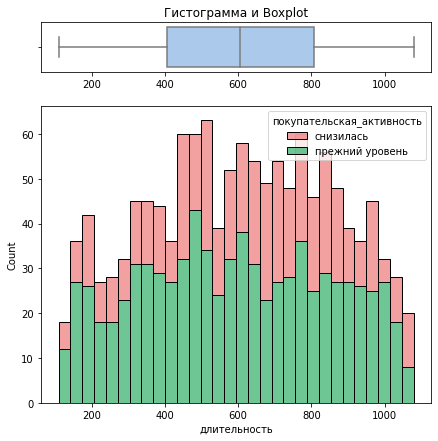

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


In [32]:
box_hist(market_file, 'длительность', 'покупательская_активность')

**Вывод:**
- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Раз проект нацелен на бинарный целевой признак, советую проводить анализ с разделением по целевому графику, т.е на одном графике строить две гистограммы с разбивкой по столбцу `Покупательская активность`.

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Исправил.

#### Построим гистограмму и boxplot для столбца акционные_покупки (среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев)

In [33]:
box_hist(market_file, 'акционные_покупки', 'покупательская_активность')

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Кстати, если тебе поднадоел стандартный `matplotlib`, попробуй пострить графики с помощью [plotly](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Вот вариант с plotly)

In [ ]:
import plotly.express as px

fig = px.histogram(market_file,
                    x = 'акционные_покупки',
                    color = 'покупательская_активность',
                    marginal = 'box',
                    nbins=30,
                    opacity = 1,
                    barmode = 'group',
                    title = 'Распределение значений столбца акционные_покупки с разделением по покупательская_активность',
                   template="plotly_white", color_discrete_sequence=["#F08080", "#3CB371"])
fig.update_layout(
    autosize=False,
    width=750,
    height=600,
    bargap=0.2)
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.0, opacity=1)
fig.show()

**Вывод:**

- имеются выбросы, но они скорее всего связаны с тем, что есть группа пользователей, которые покупают товары только по акции.

#### Построим гистограмму и boxplot для столбца средний_просмотр_категорий_за_визит (показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца)

In [ ]:
box_hist(market_file, 'средний_просмотр_категорий_за_визит', 'покупательская_активность')

**Вывод:**

- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют

#### Построим гистограмму и boxplot для столбца неоплаченные_продукты_штук_квартал (общее число неоплаченных товаров в корзине за последние 3 месяца)

In [36]:
box_hist(market_file, 'неоплаченные_продукты_штук_квартал', 'покупательская_активность')

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


**Вывод:**

- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют
- распределение не нормальное

#### Построим гистограмму и boxplot для столбца ошибка_сервиса (число сбоев, которые коснулись покупателя во время посещения сайта)

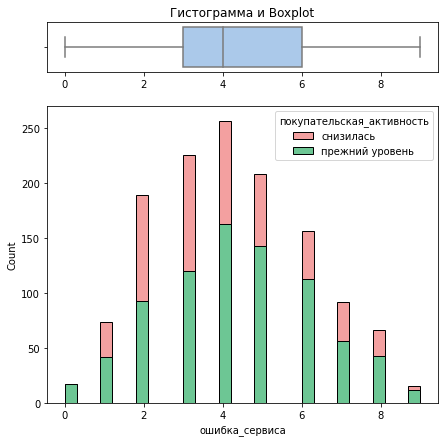

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


In [37]:
box_hist(market_file, 'ошибка_сервиса', 'покупательская_активность')

**Вывод:**

- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют
- распределение значений близко к  нормальному

#### Построим гистограмму и boxplot для столбца страниц_за_визит (среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца)

In [38]:
box_hist(market_file, 'страниц_за_визит', 'покупательская_активность')

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


**Вывод:**
- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют
- распределение значений близко к  нормальному

### Проведем анализ количественных признаков файла market_money

In [39]:
market_money.head(1)

id               период  выручка
0  215348  препредыдущий_месяц      0.0

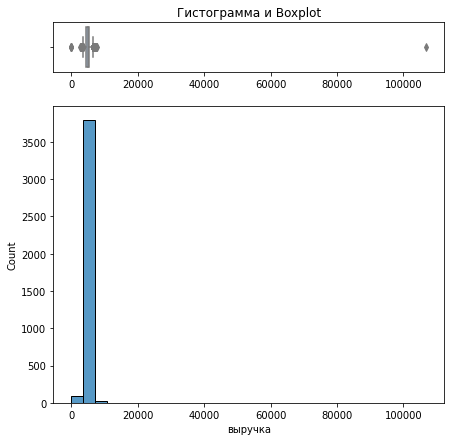

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


In [40]:
box_hist(market_money, 'выручка', None)

**Вывод:**
- в данных выброс со значением выручки 106862.2, по-видимому это единичный случай, удалим это значение.

In [41]:
market_money.query('выручка > 10000')

id         период   выручка
98  215380  текущий_месяц  106862.2

In [42]:
market_file = market_file.query('id != 215380')
market_money = market_money.query('id != 215380')

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Как вариант... Хотя я бы ушел в сторону обработки выбросов более универсальным способом, например, отсекать по правилу трех сигм...

In [43]:
box_hist(market_money, 'выручка', None)

count    3897.000000
mean     4999.287760
std       706.970089
min         0.000000
25%      4590.000000
50%      4956.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64


### Проведем анализ количественных признаков файла market_time

In [44]:
market_time.head(2)

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13

In [45]:
box_hist(market_time, 'минут', None)

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


**Вывод:**

- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют
-  распределение значений нормальное

### Проведем анализ количественных признаков файла money

In [46]:
money.head(1)

id  прибыль
0  215348     0.98

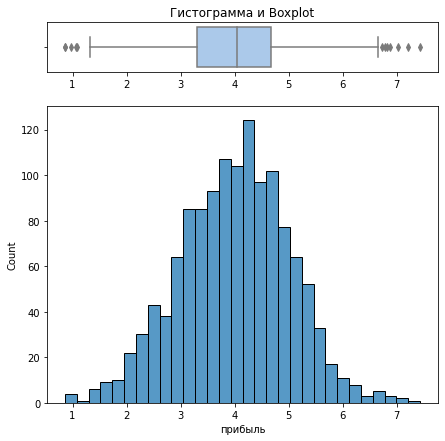

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


In [47]:
box_hist(money, 'прибыль', None)

**Вывод:**

- среднее и медиана практически равны соответственно, следовательно выбросы в данных отсутствуют
-  распределение значений нормальное

### Проведем анализ качественных признаков файла market_file

In [48]:
market_file.head(1)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 снизилась     премиум                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121                0.0   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     товары для детей                                    6   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5

In [49]:
def visualization_cat(df, column, x_label_bar, y_label_bar, title_bar, title_pie):
    """""
    Визуализация категориальных данных
    
    """""
    
    fig, axs = plt.subplots(1, 2)
    
    group_bar = df[column].value_counts(ascending=False)
    group_bar.plot(
            grid=True,
            figsize = (10,5),  
            kind='bar',
            xlabel= x_label_bar, 
            ylabel= y_label_bar, 
            title = title_bar,
            alpha = 0.8,
            color=["#3CB371","#F08080", '#FF69B4', '#EEE8AA'],
            ax=axs[1]
    )
    plt.xticks(rotation=35)

    label = []
    for i in group_bar:
       label.append(i) 
    for i in range(len(label)):
        plt.text(y = label[i], x = i - 0.06, s = label[i], fontsize='large', size=14)

    group_pie = (df.groupby(column).agg({column: ['count']}))
    group_pie['%'] = (group_pie[column]['count'] / df[column].count() *100).round(0)
    colors = ["#3CB371","#F08080",'#FF69B4', '#EEE8AA', '#20B2AA','#BC8F8F']
    group_pie = group_pie.sort_values(by='%', ascending=False)
    (group_pie
     .plot(kind = 'pie',
           y='%',
           labeldistance=1.15,
           ylabel= '',
           legend=False,
           title=title_pie,
           figsize = (10,5),
           autopct='%1.0f%%',
           fontsize=11,
           colors=colors,
           wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
           ax=axs[0])
    )
    plt.show()

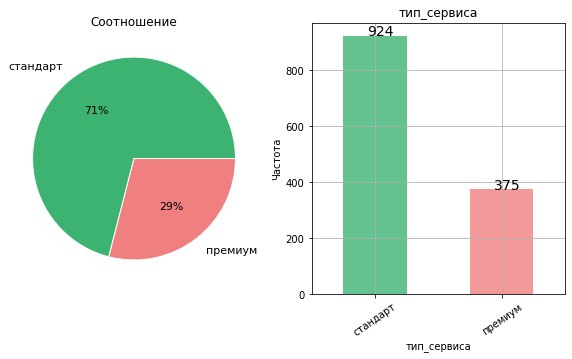

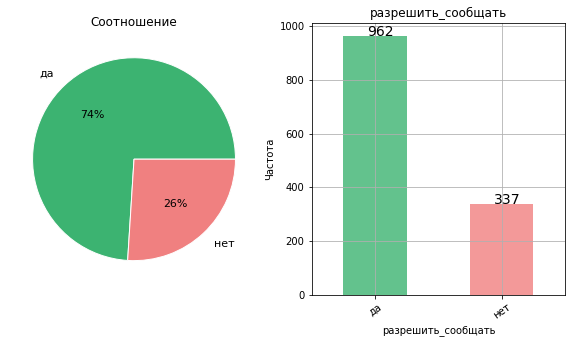

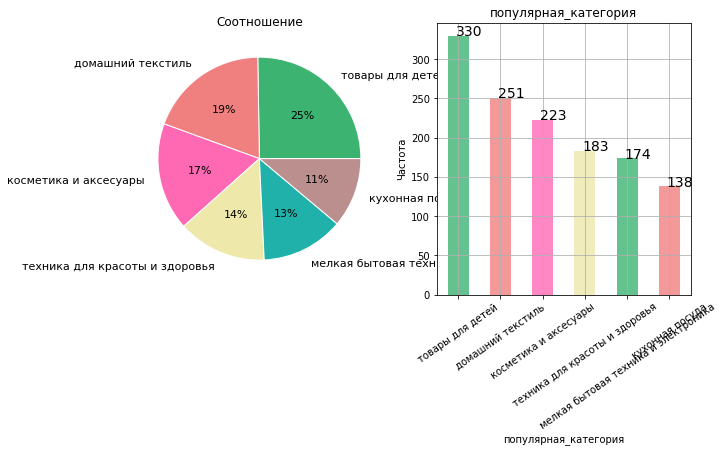

In [50]:
cat_col_name = ['покупательская_активность','тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
for cat in cat_col_name:
    visualization_cat(market_file, cat , cat, 'Частота', 
                  cat, 'Cоотношение' )

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Красота  👍

**Вывод:**

- у 38% пользователей снизилась покупательская активнось, за анализируемый период
- большинство клиентов 71% имеют имеют стандартный аккаунт
- примерно 1/4 часть клиентов запрелила присылать дополнительные предложения о товаре
- самая популярная категория товаров у покупателей "товары для детей"

### Проведем анализ качественных признаков файла market_money

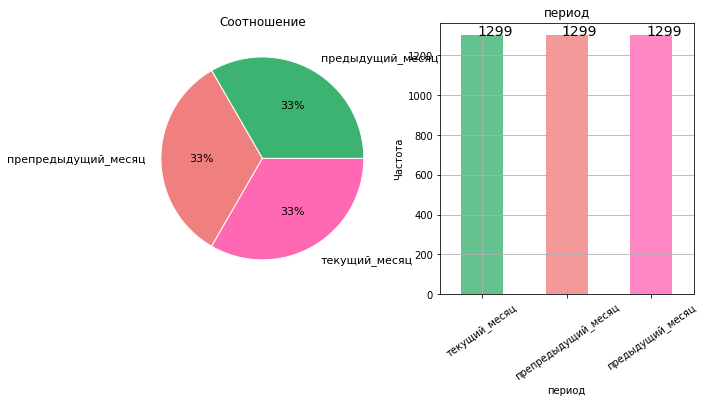

In [51]:
visualization_cat(market_money, 'период' , 'период', 'Частота', 
                  'период', 'Cоотношение')

**Вывод:**
- все периоды представлены в файле в равных долях

### Проведем анализ качественных признаков файла market_time

In [52]:
visualization_cat(market_time, 'период' , 'период', 'Частота', 
                  'период', 'Cоотношение')

**Вывод:**

- периоды представлены в файле в равных долях

### Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период

In [53]:
list_noactivity = market_money.query('выручка == 0')['id'].unique()
list_noactivity

array([215348, 215357, 215359])

In [54]:
len(market_money) - len(market_money[~market_money['id'].isin(list_noactivity)])

9

**Вывод:**

- строки отфильтрованны корректно, 3 id по 3 периода.

Уберем данные id из всех файлов:

In [55]:
market_file = market_file[~market_file['id'].isin(list_noactivity)]
market_file['id'].count()

1296

In [56]:
market_money = market_money[~market_money['id'].isin(list_noactivity)]
market_money['id'].count()

3888

In [57]:
market_time = market_time[~market_time['id'].isin(list_noactivity)]
market_time['id'].count()

2594

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

    
![](https://i.gifer.com/NdG.gif)

## Объединение таблиц

Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

### Объединим датафреймы:

In [58]:
market_mt = market_money.merge(market_time, on=['id', 'период'], how='outer')

In [59]:
market_mt.head()

id               период  выручка  минут
0  215349  препредыдущий_месяц   4472.0    NaN
1  215349        текущий_месяц   4971.6   10.0
2  215349     предыдущий_месяц   5216.0   12.0
3  215350  препредыдущий_месяц   4826.0    NaN
4  215350        текущий_месяц   5058.4   13.0

In [60]:
market_un = market_mt.pivot_table(index='id', columns ='период', values=['выручка', 'минут'])
market_un.head()

выручка                                              минут  \
период предыдущий_месяц препредыдущий_месяц текущий_месяц предыдущий_месяц   
id                                                                           
215349           5216.0              4472.0        4971.6             12.0   
215350           5457.5              4826.0        5058.4              8.0   
215351           6158.0              4793.0        6610.4             11.0   
215352           5807.5              4594.0        5872.5              8.0   
215353           4738.5              5124.0        5388.5             10.0   

                      
период текущий_месяц  
id                    
215349          10.0  
215350          13.0  
215351          13.0  
215352          11.0  
215353          10.0

In [61]:
market_un.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц','выручка_текущий_месяц','минуты_предыдущий_месяц','минуты_текущий_месяц']
market_un = market_un.reset_index(drop=False)
market_un = market_un[['id', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц' ,'выручка_текущий_месяц','минуты_предыдущий_месяц','минуты_текущий_месяц']]

In [62]:
market_un.head()

id  выручка_препредыдущий_месяц  выручка_предыдущий_месяц  \
0  215349                       4472.0                    5216.0   
1  215350                       4826.0                    5457.5   
2  215351                       4793.0                    6158.0   
3  215352                       4594.0                    5807.5   
4  215353                       5124.0                    4738.5   

   выручка_текущий_месяц  минуты_предыдущий_месяц  минуты_текущий_месяц  
0                 4971.6                     12.0                  10.0  
1                 5058.4                      8.0                  13.0  
2                 6610.4                     11.0                  13.0  
3                 5872.5                      8.0                  11.0  
4                 5388.5                     10.0                  10.0

In [63]:
market_un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1297 non-null   int64  
 1   выручка_препредыдущий_месяц  1296 non-null   float64
 2   выручка_предыдущий_месяц     1296 non-null   float64
 3   выручка_текущий_месяц        1296 non-null   float64
 4   минуты_предыдущий_месяц      1297 non-null   float64
 5   минуты_текущий_месяц         1297 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 60.9 KB


In [64]:
market_file.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   
5  215353                 снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
1     товары для детей                                    4   
2    домашний текстиль                                    5   
3     товары для детей                                    5   
4     товары для детей                                    3   
5    домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4

In [65]:
market = market_file.merge(market_un, on=['id'], how='left')

Удалим столбец id, т.к он не понадобится в дальнейшем для моделирования:

In [66]:
market = market.drop('id', axis=1)

In [67]:
market.isna().sum()

покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_препредыдущий_месяц            0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
минуты_предыдущий_месяц                0
минуты_текущий_месяц                   0
dtype: int64

**Вывод:**
    
- объединение таблиц прошло корректно

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, согласен, вроде все корректно)

## Корреляционный анализ


Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. 
Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

### Проведем корреляционный анализ количественных признаков файла market_file

Т.к. не все значения количественных признаков распределены нормально, то будем считат корреляцию Спирмэна.

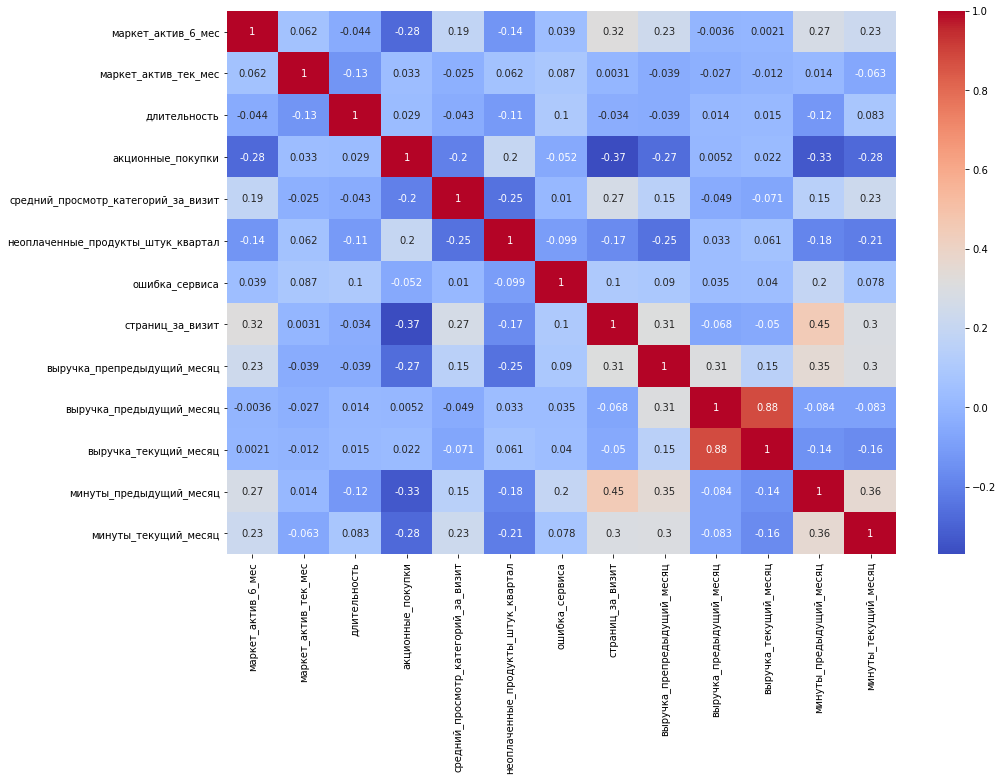

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(market.corr(method='spearman'), annot=True, cmap='coolwarm') 
plt.show()

**Вывод:**

- по большей части корреляция между признаками низкая
- высокая корреляция между признаками 'выручка_предыдущий_месяц' и 'выручка_текущий_месяц' 0.88
- средняя корреляция 'страниц_за_визит' и 'минуты_предыдущий_месяц' 0.45

### Проведем корреляционный анализ всех признаков файла market_file с помощью коэффициента корреляции Фи

In [69]:
phik_overview = market.phik_matrix()

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц']


<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Для анализа корреляций полезно строить диаграммы рассеивания. По ним можно обнаружить нелинейные зависимости, которые мы коэффициентами корреляции Пирсона не выявим. Также они позволяют обнаружить выбросы - точки, которые сильно занижают коэффициенты корреляции - тоже важноезамечание для анализа

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Можно здесь уточнить - имеется ввиду, что нужно построить диаграммы рассеивания между всеми числовыми признаками файла? 
Это 13*12 = 156 графиков) В модели регрессии в прошлом проекте, диаграммы рассеивания мы строили для целевого (числовой ) и остальных числовых признаков, а здесь целевой бинарный? Или я не правильно понял...

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Все правильно, согласен, многовато) Но выход все же есть, хоть и не такой красивый 👇

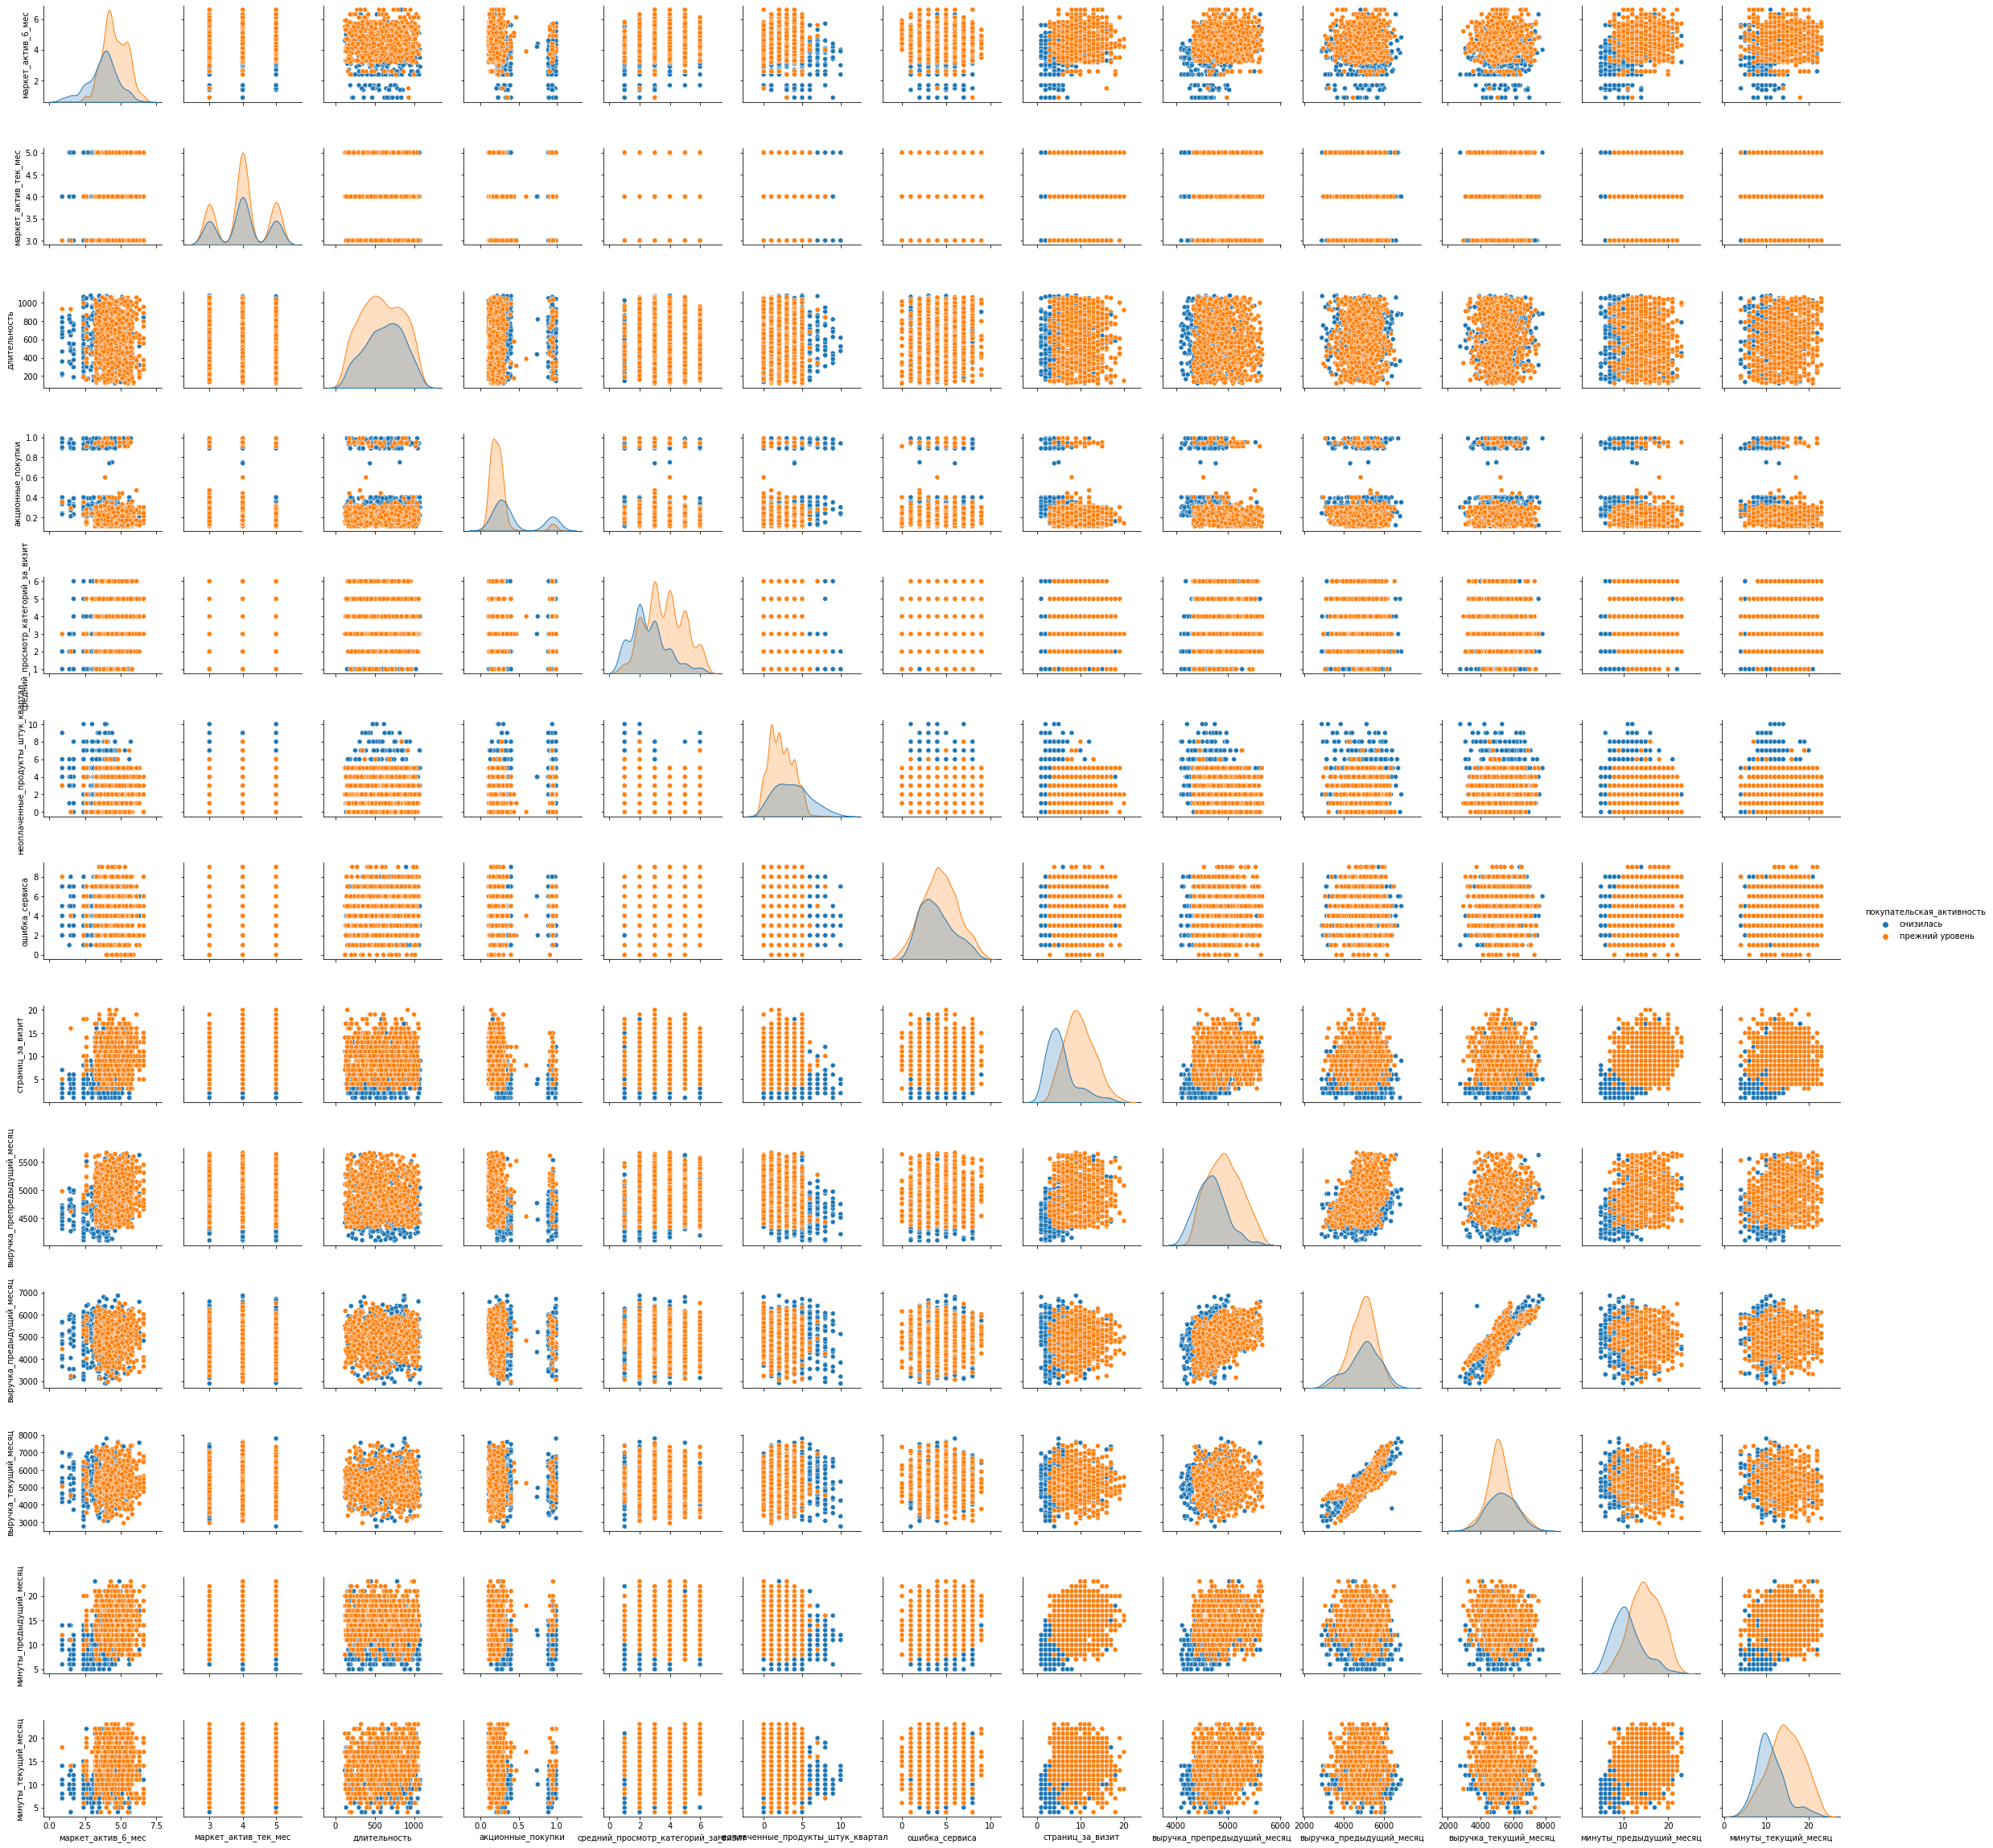

In [70]:
sns.pairplot(market, hue="покупательская_активность");

**Вывод:**

- по большей части корреляция между признаками низкая
- высокая корреляция между признаками: 'выручка_предыдущий_месяц' и 'выручка_текущий_месяц' 0.84, 'минуты_предыдущий_месяц' и "покупательская активность" 0.69, 'страниц_за_визит' и  "покупательская активность" 0.75
- средняя корреляция 'страниц_за_визит' и 'минуты_предыдущий_месяц' 0.45

***ВЫВОД:***

- мультиколлериарности между признаками не выявлено 

## Использование пайплайнов

Примените все изученные модели. Для этого используйте пайплайны.

6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

### Проверим сбалансированность классов в данных

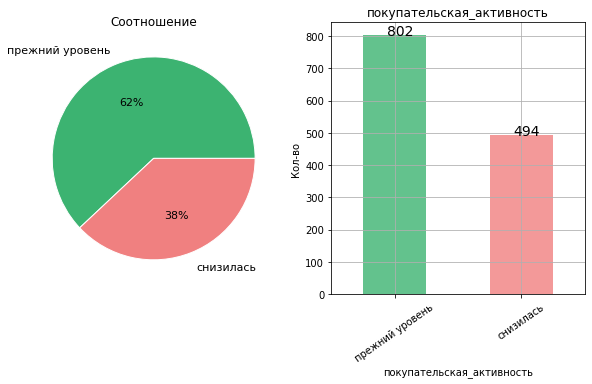

In [72]:
visualization_cat(market, 'покупательская_активность', 
                  'покупательская_активность', 'Кол-во' , 
                  'покупательская_активность', 'Cоотношение')

**Вывод:**

Классы не сбалансированны в датафреймы, применим при разделении данных к тренировочным данным стратификацию (также возможно для моделей логистической регрессия и SVM примениим параметр class_weight='balanced', методы оверсэмплинга и андерсэмплинга в рамках данной работы применять не будем).

Для оценки моделей применим ***ROC-AUC метрику***, т.к. она не чувствительна к дисбалансу классов.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Шик, можно было дополнительно попробовать побораться с дисбалансом)

### Модель KNeighborsClassifier()

В модели будем использовать:
- для кодирования категориальных признаков  кодировщики LabelEncoder, OneHotEncoder и OrdinalEncoder
- для масштабирования количественных — StandardScaler, MinMaxScaler, RobustScaler.

В качестве гиперпараметров модели будем использовать:
- скалеры количественных данных: StandardScaler, MinMaxScaler, RobustScaler
- параметр n_neighbors  в диапозоне (2, 11, 2) (в задачах бинарной классификации целесообразно выбрать нечётное значение k соседей: так проще избежать ситуации, когда число соседей разных классов совпадает)

#### Отберем количественные и котегориальные признаки

In [73]:
cat_col_names = market.select_dtypes(exclude='number').columns.tolist()
num_col_names = market.select_dtypes(include='number').columns.tolist()

In [74]:
cat_col_names

['покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'популярная_категория']

In [75]:
num_col_names

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_препредыдущий_месяц',
 'выручка_предыдущий_месяц',
 'выручка_текущий_месяц',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

#### Разделим данные на тренировочную, валидационную и тестовую выборки

In [76]:
RANDOM_STATE = 42
TEST_SIZE = 0.25



X = market.drop('покупательская_активность', axis=1)
y = market['покупательская_активность']

#X_train, X_test, y_train, y_test = train_test_split(
    #X,
    #y,
    #test_size = TEST_SIZE, 
    #random_state = RANDOM_STATE,
    #stratify = y
#)

X_train, X_test_valid, y_train, y_test_valid = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y
)
                                                                
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test_valid, y_test_valid, test_size=0.5, random_state=RANDOM_STATE, stratify=y_test_valid
)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do)

#### Применим LabelEncoder() для целевого признака

In [77]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [78]:
pred_classes = [0, 1]
label_encoder.inverse_transform(pred_classes)

array(['прежний уровень', 'снизилась'], dtype=object)

In [79]:
y_valid = label_encoder.transform(y_valid)

#### Создадим пайплайн 

In [80]:
ohe_columns = [
    'тип_сервиса',
    'разрешить_сообщать',
]

ord_columns = ['популярная_категория']

num_columns = ['маркет_актив_6_мес','маркет_актив_тек_мес','длительность','акционные_покупки',
               'средний_просмотр_категорий_за_визит','неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса','страниц_за_визит','выручка_препредыдущий_месяц','выручка_предыдущий_месяц','выручка_текущий_месяц',
               'минуты_предыдущий_месяц','минуты_текущий_месяц'
              ]

In [81]:
market['популярная_категория'].value_counts()

товары для детей                        329
домашний текстиль                       250
косметика и аксесуары                   223
техника для красоты и здоровья          182
мелкая бытовая техника и электроника    174
кухонная посуда                         138
Name: популярная_категория, dtype: int64

In [82]:

# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[['товары для детей',
                            'домашний текстиль',
                            'косметика и аксесуары',
                            'техника для красоты и здоровья',
                            'мелкая бытовая техника и электроника',
                            'кухонная посуда']],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

        
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
    ], remainder='passthrough',
    
)

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', KNeighborsClassifier())
    ]
)

param_grid = [{
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()], #,'passthrough'
    'models__n_neighbors': range(2, 11, 2),
    }
]

grid_knn = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_iter=30,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

#### Обучим модель и посчитаем метрику c лучшими параметрами модели

In [83]:
grid_knn.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning:

The total space of parameters 15 is smaller than n_iter=30. Running 15 iterations. For exhaustive searches, use GridSearchCV.

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['тип_сервиса',
                                 

**Вывод:**

In [84]:
print(f'Лучшие параметры модели:  , {grid_knn.best_params_} \n\nМетрика ROC-AUC: {(grid_knn.best_score_).round(3)}')

Лучшие параметры модели:  , {'preprocessor__num': StandardScaler(), 'models__n_neighbors': 10} 

Метрика ROC-AUC: 0.882


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Пайплайн реализован качественно, добавить нечего 👏

### Модель DecisionTreeClassifier()

В модели будем использовать:
- для кодирования категориальных признаков  кодировщики LabelEncoder, OneHotEncoder и OrdinalEncoder
- для масштабирования количественных — StandardScaler, MinMaxScaler, RobustScaler.

В качестве гиперпараметров модели будем использовать:
- скалеры количественных данных: StandardScaler, MinMaxScaler, RobustScaler
- параметры:
   - min_samples_split: range(2, 20),
   - min_samples_leaf: range(1, 20),
   - max_depth: range(2, 20) 

In [85]:
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[['товары для детей', 'домашний текстиль', 'косметика и аксесуары',
                            'кухонная посуда', 'техника для красоты и здоровья',
                            'мелкая бытовая техника и электроника']],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

        
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
    ], remainder='passthrough',
    
)

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [{
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()], #,'passthrough'
    'models__min_samples_split': range(2, 10),
    'models__min_samples_leaf': range(1, 10),
    'models__max_depth': range(2, 10) 
    }
]

grid_tree = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_iter=30,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [86]:
grid_tree.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.9/site-packages

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['тип_сервиса',
                                 

**Вывод:**

In [87]:
print(f'Лучшие параметры модели:  , {grid_tree.best_params_} \n\nМетрика ROC-AUC: {(grid_tree.best_score_).round(3)}')

Лучшие параметры модели:  , {'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 3, 'models__min_samples_leaf': 9, 'models__max_depth': 5} 

Метрика ROC-AUC: 0.863


### Модель LogisticRegression()

В модели будем использовать:
- для кодирования категориальных признаков  кодировщики LabelEncoder, OneHotEncoder и OrdinalEncoder
- для масштабирования количественных — StandardScaler, MinMaxScaler, RobustScaler.

В качестве гиперпараметров модели будем использовать:
- скалеры количественных данных: StandardScaler, MinMaxScaler, RobustScaler
- параметры:
     - penalty: ['l2', 'l1', 'elasticnet'],
     - solver': ['liblinear', 'saga'],
     - _C': range(1, 20),
     - class_weight': ['balanced', 'None']

Подберем лучшие гиперпараметры для модели:

In [3]:
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[['товары для детей', 'домашний текстиль', 'косметика и аксесуары',
                            'кухонная посуда', 'техника для красоты и здоровья',
                            'мелкая бытовая техника и электроника']],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

        
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
    ], remainder='passthrough',
    
)

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

param_grid = [{
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()], #,'passthrough'
    'models__penalty': ['l2', 'l1', 'elasticnet'],
    'models__solver': ['liblinear', 'saga', 'newton-cholesky'],
    'models__C': range(1, 30),
    'models__class_weight': ['balanced', 'None']
    }
]

grid_log = RandomizedSearchCV(
    
    pipe_final, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_iter=30,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

NameError: name 'Pipeline' is not defined

In [89]:
grid_log.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.9/site-packages

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['тип_сервиса',
                                 

**Вывод:**

In [90]:
print(f'Лучшие параметры модели:  , {grid_log.best_params_} \n\nМетрика ROC-AUC: {(grid_log.best_score_).round(4)}')

Лучшие параметры модели:  , {'preprocessor__num': MinMaxScaler(), 'models__solver': 'liblinear', 'models__penalty': 'l2', 'models__class_weight': 'balanced', 'models__C': 6} 

Метрика ROC-AUC: 0.8954


### Модель SVC()

В модели будем использовать:
- для кодирования категориальных признаков  кодировщики LabelEncoder, OneHotEncoder и OrdinalEncoder
- для масштабирования количественных — StandardScaler, MinMaxScaler, RobustScaler.

В качестве гиперпараметров модели будем использовать:
- скалеры количественных данных: StandardScaler, MinMaxScaler, RobustScaler
- параметры:
     - kernel: ['poly', 'sigmoid'],
     - degree: range(1, 10)

In [91]:
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[['товары для детей', 'домашний текстиль', 'косметика и аксесуары',
                            'кухонная посуда', 'техника для красоты и здоровья',
                            'мелкая бытовая техника и электроника']],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

        
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
    ], remainder='passthrough',
    
)

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', SVC(random_state=RANDOM_STATE))
    ]
)

param_grid = [{
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()], #,'passthrough'
    'models__kernel': ['poly', 'sigmoid'],
    'models__degree': range(1,10)
    }
]

grid_svc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_iter=30,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [92]:
grid_svc.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.9/site-packages

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['тип_сервиса',
                                 

**Вывод:**

In [93]:
print(f'Лучшие параметры модели:  , {grid_svc.best_params_} \n\nМетрика ROC-AUC: {(grid_svc.best_score_).round(4)}')

Лучшие параметры модели:  , {'preprocessor__num': StandardScaler(), 'models__kernel': 'poly', 'models__degree': 1} 

Метрика ROC-AUC: 0.8953


### Выбор лучшей модели на основе метрики ROC-AUC

In [94]:
columns = ['Модель' , 'ROC-AUC']
data_list = [
    ['KNeighborsClassifier', (grid_knn.best_score_).round(4)],
    ['DecisionTreeClassifier', (grid_tree.best_score_).round(4)], 
    ['LogisticRegression',(grid_log.best_score_).round(4)], 
    ['SVC', (grid_svc.best_score_).round(4)]
]
models_scores = pd.DataFrame(data=data_list, columns=columns)

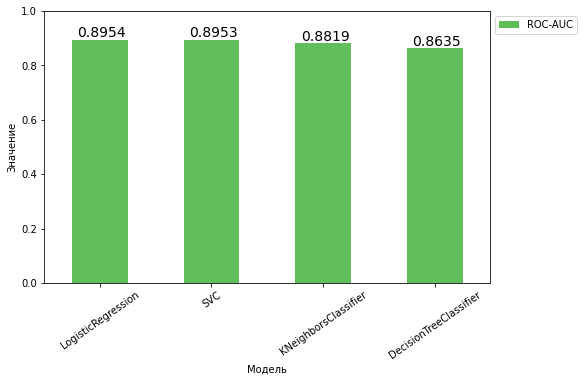

In [95]:
(
  models_scores.sort_values(by='ROC-AUC', ascending=False)
    .plot(kind='bar',
          grid=False,
          x='Модель',
          alpha = 0.7,
          rot=35,
          figsize = (8,5),
          color='#1ca315'
         )
)
group_bar = models_scores.sort_values(by='ROC-AUC', ascending=False)['ROC-AUC']
label = []
for i in group_bar:
    label.append(i) 
for i in range(len(label)):
    plt.text(y = label[i] + 0.01, x = i - 0.2 , s = label[i], size=14, color='black')

plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.ylabel('Значение')
plt.show()

**Вывод:**
    
Лучшей моделью по метрике ROC-AUC, c незначительной разницей, оказалась модель LogisticRegression (логистическая регрессия). С незначительной разницей хорошо показала себя модель SVC. Все модели показали примерно одинаковый результат.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Как вариант, можно было выбор модели тоже в пайплайн реализовать. А еще, отличным решением было бы ансамблирование полученных моделей)

## Анализ важности признаков

- Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
- Сделайте выводы о значимости признаков:
     - какие признаки мало значимы для модели;
     - какие признаки сильнее всего влияют на целевой признак;
     - как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

### Обучим модель логистической регрессии с лучшими гиперпараметрами

#### На тренировочной выборке:

In [108]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

        
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns),
    ], remainder='passthrough',
    
)


pipe_final_Log = Pipeline(
    [
        ('preprocessor', data_preprocessor),
    ]
)

In [109]:
X_train_pre = pipe_final_Log.fit_transform(X_train)
X_test_pre = pipe_final_Log.transform(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [110]:
X_pre = pd.DataFrame(X_test_pre, 
                 columns = 
                 X_train.columns.tolist())

In [111]:
X_pre.head(2)

тип_сервиса  разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
0          0.0                 0.0                 4.0              0.614035   
1          1.0                 1.0                 5.0              0.543860   

   длительность  акционные_покупки  популярная_категория  \
0           0.5           0.903967              0.272727   
1           1.0           0.773486              0.159091   

   средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
0                                  0.4                                 0.1   
1                                  0.2                                 0.7   

   ошибка_сервиса  страниц_за_визит  выручка_препредыдущий_месяц  \
0        0.888889          0.263158                     0.536334   
1        0.666667          0.210526                     0.135048   

   выручка_предыдущий_месяц  выручка_текущий_месяц  минуты_предыдущий_месяц  \
0                  0.084715               0.294062                 0.277778   
1                  0.692524               0.686993                 0.277778   

   минуты_текущий_месяц  
0              0.263158  
1              0.210526

In [112]:
print(f'Лучшие параметры модели:  , {grid_log.best_params_} {grid_log.best_score_}')

Лучшие параметры модели:  , {'preprocessor__num': MinMaxScaler(), 'models__solver': 'liblinear', 'models__penalty': 'l2', 'models__class_weight': 'balanced', 'models__C': 6} 0.8953707323761819


In [113]:
model = LogisticRegression(random_state=RANDOM_STATE, penalty='l2', solver='liblinear', class_weight = 'balanced', C=6)
model.fit(X_train_pre, y_train)

LogisticRegression(C=6, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [114]:
print(f'ROC_AUC на тренировочной выборке: {roc_auc_score(y_test, model.predict_proba(X_test_pre)[:,1])}')

ROC_AUC на тренировочной выборке: 0.9017504234895539


#### На валидационной выборке:

In [115]:
X_valid_pre = pipe_final_Log.fit_transform(X_valid)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [116]:
#X_valid, X_test, y_valid, y_test 

In [117]:
model_valid = LogisticRegression(random_state=RANDOM_STATE, penalty='l2', solver='liblinear', class_weight = 'balanced', C=6)
model_valid.fit(X_valid_pre, y_valid)

LogisticRegression(C=6, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [118]:
print(f'ROC_AUC на валидационной выборке: {roc_auc_score(y_test, model_valid.predict_proba(X_test_pre)[:,1])}')

ROC_AUC на валидационной выборке: 0.8917748917748917


**Вывод**:
 - значения метрики ROC_AUC на тренировочной и валидационной выборке практически равны, следовательно переобучение или недообучение модели отсутствует

<div style="border:solid purple 5px; padding: 20px">
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>
    
<h3> Функция zip <a class="tocSkip"> </h3>

Функция zip создаёт итератор, который комбинирует элементы нескольких списков. Это позволяет осуществлять параллельный обход списков в циклах for или, например, выполнять параллельную сортировку.

![](https://i.ibb.co/MPPZ6TL/image.png)

### Проанализируем значимость признаков обученной модели логистической регрессии.

#### Построим график значимости признаков обученной модели логистической регрессии

In [119]:
selector = SelectKBest(f_classif, k='all')
selector.fit(X_train_pre, y_train)

SelectKBest(k='all')

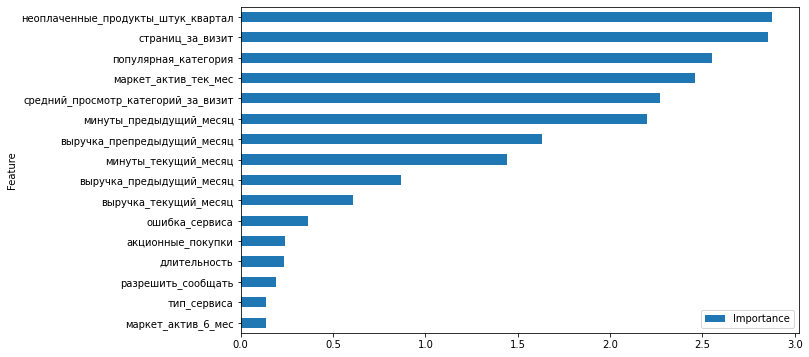

In [120]:
coefficients = model.coef_[0]

features_names = X_pre.columns[selector.get_support(indices=True)]

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

In [121]:
feature_importance.sort_values(by='Importance', ascending=False)['Feature'].to_list()

['неоплаченные_продукты_штук_квартал',
 'страниц_за_визит',
 'популярная_категория',
 'маркет_актив_тек_мес',
 'средний_просмотр_категорий_за_визит',
 'минуты_предыдущий_месяц',
 'выручка_препредыдущий_месяц',
 'минуты_текущий_месяц',
 'выручка_предыдущий_месяц',
 'выручка_текущий_месяц',
 'ошибка_сервиса',
 'акционные_покупки',
 'длительность',
 'разрешить_сообщать',
 'тип_сервиса',
 'маркет_актив_6_мес']

**Вывод** 

Оценка влияния признаков на целевой признак:

- c отрывом лидируют признаки неоплаченные_продукты_штук_квартал' и 'страниц_за_визит'

- далее близко друг к другу идут 'популярная_категория', 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'минуты_предыдущий_месяц', 'выручка_препредыдущий_месяц'

- далее 'выручка_текущий_месяц', 'ошибка_сервиса', 'акционные_покупки', 'длительность'.

- и далее наименее значимые для модели признаки  'разрешить_сообщать', 'тип_сервиса', 'маркет_актив_6_мес'

Эти признаки можно использовать для анализа поведения клиента и принятии бизнес-решений - разрабатывать различные мероприятия, например, для своевременного ответа на поведение клиентов.

При моделировании малозначимые признаки можно убрать из модели, что может снизить 'шум' от них и повысить качество предсказаний модели.

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Здесь добавил про удаление малозначимых признаков.

#### Применим permutation importance

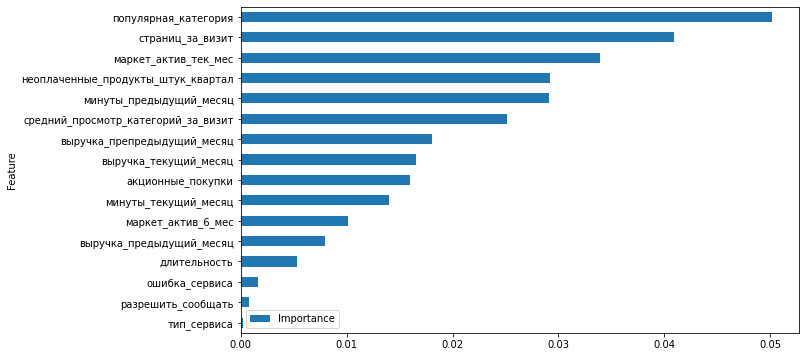

In [122]:
def custom_roc_auc(model, X, y):
    y_pred = model.predict(X)
    score = roc_auc_score(y, y_pred)
    return score

result = permutation_importance(model, X_test_pre, y_test, scoring=custom_roc_auc)

feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

**Вывод:**
    
Перемешивание значений только поменяло местами фаворитов, малозначимые признаки так и остались малозначимыми

#### Построим график общей значимости признаков (анализ SHAP-значений):

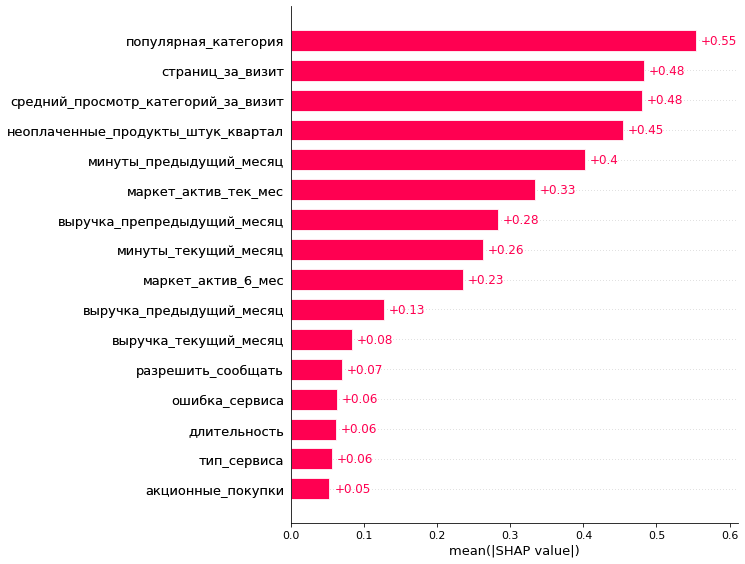

In [123]:
explainer = shap.Explainer(model, X_pre, keep_index=True)
shap_values = explainer(X_pre)

shap.plots.bar(shap_values, max_display=21)

**Вывод**

Вычисление значений Шепли позволяет более точно оценивать вклад признаков как на все решения модели, так и для каждого конкретного наблюдения. Здесь на первое место вышел признак 'популярная_категория', который и был в числе фаворитов при оценке значимости не методом Шепли. Малозначимые признаки так и остались малозначимыми.


#### Построим график влияния признаков влияют на каждое предсказание модели:

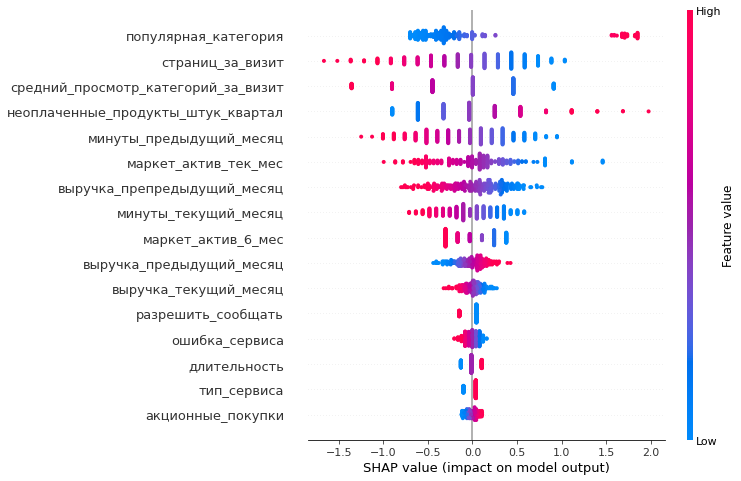

In [124]:
shap.plots.beeswarm(shap_values, max_display=16) 

Посмотрим на отдельные примеры неверно классифицированных объектов. Для этого отфильтруем такие наблюдения по двум критериям:
Истинное значение целевого признака — 1 и вероятность принадлежность к классу 1 была оценена ниже чем 0.3

In [125]:
X_pre['y_test'] = y_test.tolist()
X_pre['predict_proba'] = model.predict_proba(X_test_pre)[:,1]

X_pre[(X_pre['y_test']==1)&(X_pre['predict_proba']<0.3)][['популярная_категория', 'страниц_за_визит']] 

популярная_категория  страниц_за_визит
32               0.034091          0.315789
53               0.136364          0.473684
68               0.056818          0.526316
77               0.056818          0.578947
78               0.079545          0.842105
121              0.181818          0.631579
146              0.068182          0.736842
149              0.215909          0.789474
164              0.147727          0.736842
165              0.113636          0.421053
234              0.113636          0.631579
251              0.102273          0.473684

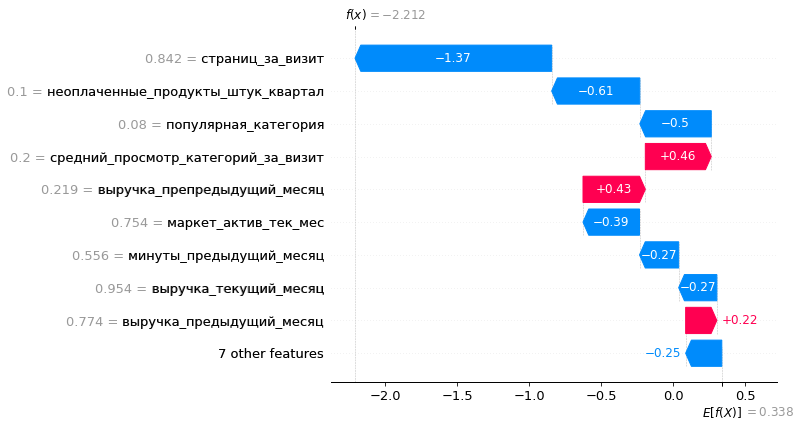

In [126]:
shap.plots.waterfall(shap_values[78])

**Вывод**

Сильнее всего  на классификацию  объекта с индексом 78 влияет признак страниц_за_визит, он «перетягивает» предсказание в сторону класса 0. 

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Просто космос 🚀

![](https://i.gifer.com/sbb.gif)

</div>

## Сегментация покупателей

Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Разработайте модель, которая предскажет вероятность снижения покупательской активности.
Выделите сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность. Используйте данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию вы можете проанализировать больше одного сегмента.

Ниже несколько примеров сегментов, но вы также можете выделить свой:

- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

### Добавим в тестовую выборку результаты классификации модели и сумму выручки за 3 месяца

- Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
- Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.
- Сделайте выводы о сегментах:
какой сегмент вы взяли для дополнительного исследования,
какие предложения вы сделали и почему.

In [127]:
X_for_segm = X_test.copy()
X_for_segm['predict_proba'] = model.predict_proba(X_test_pre)[:,1]

X_for_segm['покупательская_активность'] = ( 
    X_for_segm['predict_proba'].apply(lambda predict_proba: 'снизилась' if predict_proba >= 0.5 else 'не изменилась')  
)
X_for_segm['выручка_всего'] = (
    X_for_segm['выручка_предыдущий_месяц'] +
    X_for_segm['выручка_текущий_месяц'] + 
    X_for_segm['выручка_препредыдущий_месяц']
)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Отдельный плюс за лямбду-функцию 💪

In [128]:
X_for_segm.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
394     премиум                 да                 4.4                     4   
264    стандарт                нет                 4.0                     5   
599    стандарт                 да                 5.5                     3   
872    стандарт                 да                 4.3                     5   
883     премиум                нет                 4.2                     4   

     длительность  акционные_покупки                  популярная_категория  \
394           987               0.35        техника для красоты и здоровья   
264           862               0.25                      товары для детей   
599           473               0.13                     домашний текстиль   
872           446               0.15  мелкая бытовая техника и электроника   
883           978               0.11                       кухонная посуда   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
394                                    3                                   1   
264                                    2                                   7   
599                                    6                                   1   
872                                    4                                   1   
883                                    2                                   0   

     ошибка_сервиса  страниц_за_визит  выручка_препредыдущий_месяц  \
394               8                 6                       4932.0   
264               6                 5                       4308.0   
599               3                10                       4667.0   
872               5                 5                       4683.0   
883               2                 5                       5176.0   

     выручка_предыдущий_месяц  выручка_текущий_месяц  минуты_предыдущий_месяц  \
394                    3222.0                 4169.7                     10.0   
264                    5604.0                 6055.1                     10.0   
599                    4721.0                 4897.8                     13.0   
872                    4329.0                 4152.2                     19.0   
883                    4480.0                 4006.8                     18.0   

     минуты_текущий_месяц  predict_proba покупательская_активность  \
394                   9.0       0.485062             не изменилась   
264                   8.0       0.958988                 снизилась   
599                  18.0       0.046208             не изменилась   
872                  14.0       0.183424             не изменилась   
883                  15.0       0.194180             не изменилась   

     выручка_всего  
394        12323.7  
264        15967.1  
599        14285.8  
872        13164.2  
883        13662.8

### Посмотрим, какая категория товаров принесла больше всего выручки за 3 месяца

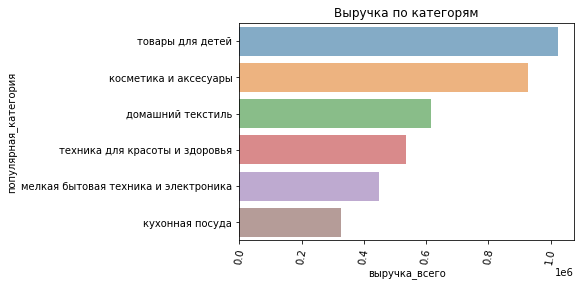

In [129]:
revenue =  X_for_segm.pivot_table(index='популярная_категория', 
                       values='выручка_всего', 
                       aggfunc=['sum'])
revenue.columns=['выручка_всего']

revenue = revenue.sort_values(by='выручка_всего', ascending=False)
revenue.reset_index(inplace=True)
#revenue.plot(kind='bar', alpha=0.8)
sns.barplot(data=revenue,y='популярная_категория',x='выручка_всего',alpha=0.6)
plt.title('Выручка по категорям')
plt.xticks(rotation=80)
plt.show()


**Вывод:**
    
- больше всего выручки принесли товары из категории товары для детей, косметика и аксессуары и домашний текстиль и эти категории принесли выручки больше, чем все остальные вместе взятые категории.

### Посмотрим покупательскую активность по категориям товаров:

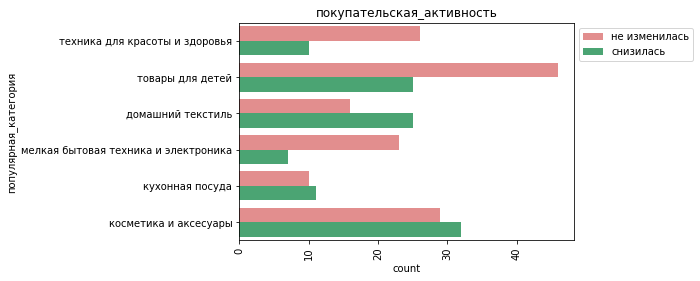

In [130]:
sns.countplot(y="популярная_категория", hue="покупательская_активность",
                data=X_for_segm, palette=["#F08080", "#3CB371"])
plt.xticks(rotation=90)
plt.title('покупательская_активность')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

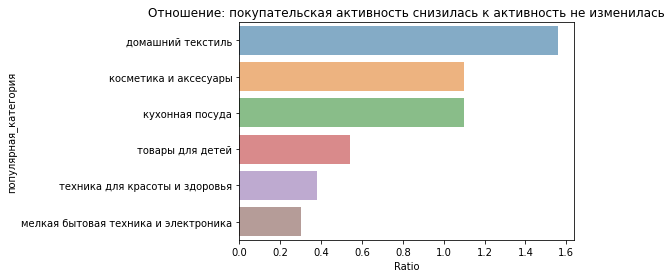

In [131]:
activity = X_for_segm.pivot_table(index='популярная_категория', 
                       columns=('покупательская_активность'),
                       values='тип_сервиса', 
                       aggfunc=['count'])
activity.columns = ['не изменилась', 'снизилась']
activity['Ratio'] = (activity['снизилась'] / activity['не изменилась']).round(2)
activity = activity.sort_values(by='Ratio', ascending=False)
activity.reset_index(inplace=True)
sns.barplot(data=activity,y='популярная_категория',x='Ratio',alpha=0.6)

plt.title('Отношение: покупательская активность снизилась к активность не изменилась')
plt.show()

**Вывод:**

- самый большой процент покупателей с прогнозом снижения покупательской активности в категориях с самой высокой выручкой: домашний текстиль и косметика и аксессуары

### Выведем значения общей значимости признаков (анализ SHAP-значений), для дальнйшего анализа

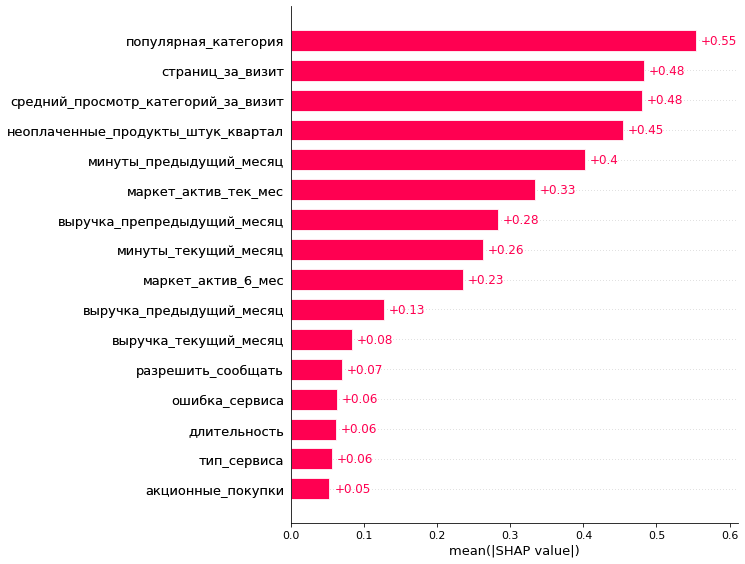

In [132]:
shap.plots.bar(shap_values, max_display=16)

### Построим графики среднего значения признаков по категориям покупок

In [133]:
im_f = X_for_segm.pivot_table(
    index='популярная_категория',
    
                              values=['страниц_за_визит',
                               'средний_просмотр_категорий_за_визит',
                               'неоплаченные_продукты_штук_квартал',
                               'минуты_предыдущий_месяц',
                               'выручка_препредыдущий_месяц',
                               'маркет_актив_тек_мес',
                               'маркет_актив_6_мес',
                               'разрешить_сообщать',
                               'ошибка_сервиса',
                               'тип_сервиса',
                               'акционные_покупки'
                              ],
                              aggfunc=['mean']
)

im_f.reset_index(inplace=True)
im_f.columns=['популярная_категория',
              'акционные_покупки',
              'выручка_препредыдущий_месяц',
              'маркет_актив_6_мес',
              'маркет_актив_тек_мес',
              'минуты_предыдущий_месяц',
              'неоплаченные_продукты_штук_квартал',
              'ошибка_сервиса',
              'средний_просмотр_категорий_за_визит',
              'страниц_за_визит']

im_f['популярная_категория']
text = im_f['популярная_категория'].to_list()

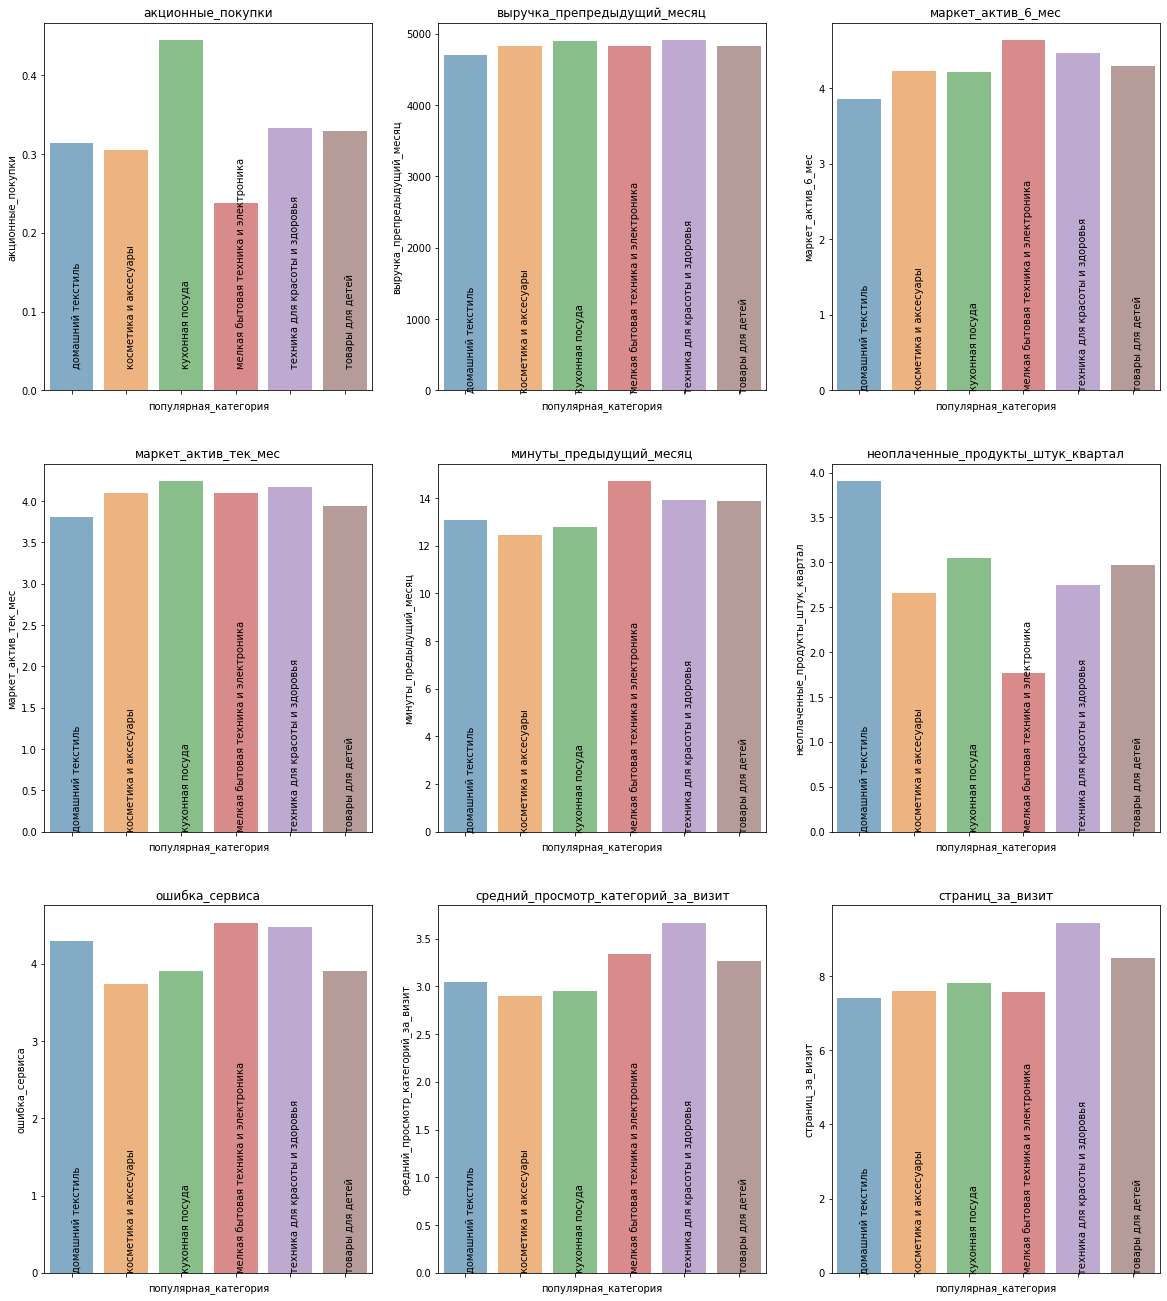

In [134]:
category = ['акционные_покупки',
              'выручка_препредыдущий_месяц',
              'маркет_актив_6_мес',
              'маркет_актив_тек_мес',
              'минуты_предыдущий_месяц',
              'неоплаченные_продукты_штук_квартал',
              'ошибка_сервиса',
              'средний_просмотр_категорий_за_визит',
              'страниц_за_визит']

fig, axes = plt.subplots(math.ceil(len(category) / 3), 3, figsize=(20, 23))
axes = axes.flat

for i in range(len(category)):
    sns.barplot(data=im_f, x='популярная_категория', y= category[i], alpha=0.60, ax=axes[i])
    axes[i].set_title(category[i])
    axes[i].set_xticklabels([])
    #axes[i].legend(im_f['популярная_категория'], loc='lower left', fontsize=12)
    for k in range(len(text)):
        axes[i].text(y = 0.03, x = k , s = text[k], size=10, rotation=90)

if (len(axes) - len(category)) != 0:
    for i in range (len(axes) - len(category)):
        axes[len(category) + i].remove()

plt.show()

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

С осями я б здесь поработал)

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Исправил. Через легенду не полу

**Вывод**:

- выделяется категория домашний текстиль с высоким средним значением в количестве не оплаченных продуктов('неоплаченные_продукты_штук_квартал') и количеством ошибок сервиса ('количество ошибок'). Можно предположить, что покупки не оплачиваются в следствии сбоев, которые коснулись покупателя во время посещения сайта, следовательно покупатель в следующий раз может не зайти на сайт и завершить заказ.
- также в категории домашний текстиль самое низкое среднее значение рассылок, звонков, показов рекламы приходящееся на клиента. клиентам может не дойти какая то важная информация - о скидках, акциях и т.д.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Доп анализ всегда приветствуется, но здесь я не совсем понял идею, для чего он)))

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Здесь доп анализ, чтобы сначала в целом посмотреть на "картину" по самому значимому признаку и уже от нее отталкиваться далее. В общем искал с чего начать))

### Выделем сегмент покупателей с самой большой выручкой и снижением активности

In [135]:
X_for_segm['выручка_всего'].describe()

count      260.000000
mean     14902.420385
std       1607.260553
min      10575.900000
25%      13718.975000
50%      14994.800000
75%      16084.600000
max      19482.800000
Name: выручка_всего, dtype: float64

In [136]:
def category_(row):
    if row['покупательская_активность'] == 'снизилась' and row['выручка_всего'] > 16000:
        return 'segment'
    else:
        return 'other'    

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

А почему 16к?)

<div class="alert alert-info"  style="box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Забыл про это написать сразу. Это значения выручки больше Q3(75%)

In [137]:
X_for_segm['segment_1'] = X_for_segm.apply(category_, axis = 1)

In [138]:
X_for_segm.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
394     премиум                 да                 4.4                     4   
264    стандарт                нет                 4.0                     5   
599    стандарт                 да                 5.5                     3   
872    стандарт                 да                 4.3                     5   
883     премиум                нет                 4.2                     4   

     длительность  акционные_покупки                  популярная_категория  \
394           987               0.35        техника для красоты и здоровья   
264           862               0.25                      товары для детей   
599           473               0.13                     домашний текстиль   
872           446               0.15  мелкая бытовая техника и электроника   
883           978               0.11                       кухонная посуда   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
394                                    3                                   1   
264                                    2                                   7   
599                                    6                                   1   
872                                    4                                   1   
883                                    2                                   0   

     ошибка_сервиса  страниц_за_визит  выручка_препредыдущий_месяц  \
394               8                 6                       4932.0   
264               6                 5                       4308.0   
599               3                10                       4667.0   
872               5                 5                       4683.0   
883               2                 5                       5176.0   

     выручка_предыдущий_месяц  выручка_текущий_месяц  минуты_предыдущий_месяц  \
394                    3222.0                 4169.7                     10.0   
264                    5604.0                 6055.1                     10.0   
599                    4721.0                 4897.8                     13.0   
872                    4329.0                 4152.2                     19.0   
883                    4480.0                 4006.8                     18.0   

     минуты_текущий_месяц  predict_proba покупательская_активность  \
394                   9.0       0.485062             не изменилась   
264                   8.0       0.958988                 снизилась   
599                  18.0       0.046208             не изменилась   
872                  14.0       0.183424             не изменилась   
883                  15.0       0.194180             не изменилась   

     выручка_всего segment_1  
394        12323.7     other  
264        15967.1     other  
599        14285.8     other  
872        13164.2     other  
883        13662.8     other

In [139]:
segmentation = X_for_segm.pivot_table(
    index='segment_1',
    
                              values=['страниц_за_визит',
                               'средний_просмотр_категорий_за_визит',
                               'неоплаченные_продукты_штук_квартал',
                               'минуты_предыдущий_месяц',
                               'выручка_препредыдущий_месяц',
                               'маркет_актив_тек_мес',
                               'маркет_актив_6_мес',
                               'разрешить_сообщать',
                               'ошибка_сервиса',
                               'тип_сервиса',
                               'акционные_покупки'
                              ],
                              aggfunc=['mean']
)

segmentation.reset_index(inplace=True)
segmentation.columns=['segment_1',
              'акционные_покупки',
              'выручка_препредыдущий_месяц',
              'маркет_актив_6_мес',
              'маркет_актив_тек_мес',
              'минуты_предыдущий_месяц',
              'неоплаченные_продукты_штук_квартал',
              'ошибка_сервиса',
              'средний_просмотр_категорий_за_визит',
              'страниц_за_визит']
segmentation

segment_1  акционные_покупки  выручка_препредыдущий_месяц  \
0     other             0.2825                  4829.504464   
1   segment             0.5575                  4795.555556   

   маркет_актив_6_мес  маркет_актив_тек_мес  минуты_предыдущий_месяц  \
0            4.320536              4.044643                13.848214   
1            3.916667              3.944444                10.777778   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  \
0                            2.843750        4.035714   
1                            3.111111        4.333333   

   средний_просмотр_категорий_за_визит  страниц_за_визит  
0                             3.254464          8.504464  
1                             2.750000          5.416667

### Построим графики среднего значения признаков по сегментам

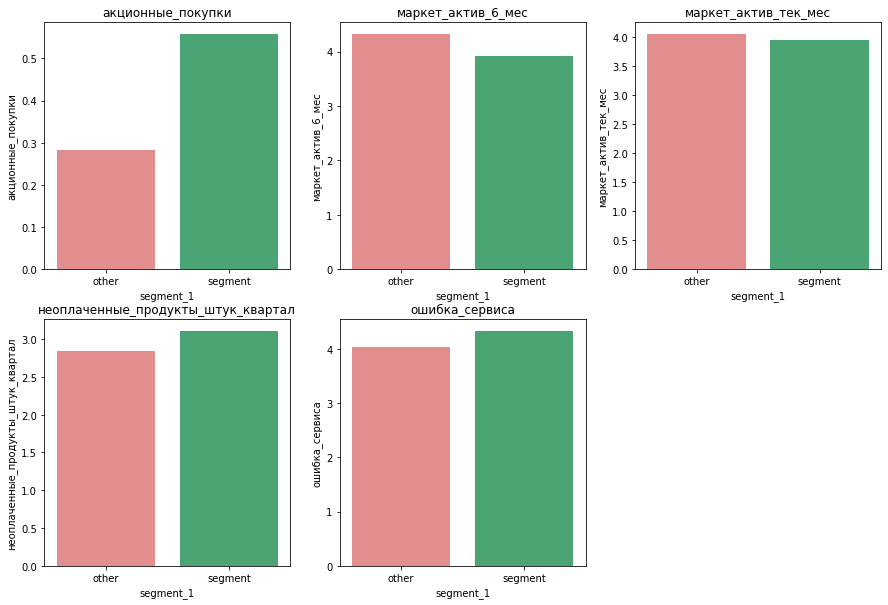

In [140]:
category = ['акционные_покупки',
            'маркет_актив_6_мес',
            'маркет_актив_тек_мес',
            'неоплаченные_продукты_штук_квартал',
            'ошибка_сервиса']

fig, axes = plt.subplots(math.ceil(len(category) / 3), 3, figsize=(15, 10))
axes = axes.flat
plt.xticks(rotation=80)
for i in range(len(category)):
    sns.barplot(data=segmentation, x='segment_1', y= category[i], alpha=1, ax=axes[i], palette=["#F08080", "#3CB371"])
    axes[i].set_title(category[i])
 
if (len(axes) - len(category)) != 0:
    for i in range (len(axes) - len(category)):
        axes[len(category) + i].remove()
plt.show()

**Вывод:**

cредниие значения segment (сегмент покупателей с самой большой выручкой и снижением активности)

- ниже остальных покупателей по следующим признакам:

    - маркет_актив_6_мес 
    - маркет_актив_тек_мес
    - ошибка_сервиса

- выше по признакам:

    - неоплаченные_продукты_штук_квартал
    - ошибка_сервиса
    - акционные_покупки

In [141]:
X_for_segm.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
394     премиум                 да                 4.4                     4   
264    стандарт                нет                 4.0                     5   
599    стандарт                 да                 5.5                     3   
872    стандарт                 да                 4.3                     5   
883     премиум                нет                 4.2                     4   

     длительность  акционные_покупки                  популярная_категория  \
394           987               0.35        техника для красоты и здоровья   
264           862               0.25                      товары для детей   
599           473               0.13                     домашний текстиль   
872           446               0.15  мелкая бытовая техника и электроника   
883           978               0.11                       кухонная посуда   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
394                                    3                                   1   
264                                    2                                   7   
599                                    6                                   1   
872                                    4                                   1   
883                                    2                                   0   

     ошибка_сервиса  страниц_за_визит  выручка_препредыдущий_месяц  \
394               8                 6                       4932.0   
264               6                 5                       4308.0   
599               3                10                       4667.0   
872               5                 5                       4683.0   
883               2                 5                       5176.0   

     выручка_предыдущий_месяц  выручка_текущий_месяц  минуты_предыдущий_месяц  \
394                    3222.0                 4169.7                     10.0   
264                    5604.0                 6055.1                     10.0   
599                    4721.0                 4897.8                     13.0   
872                    4329.0                 4152.2                     19.0   
883                    4480.0                 4006.8                     18.0   

     минуты_текущий_месяц  predict_proba покупательская_активность  \
394                   9.0       0.485062             не изменилась   
264                   8.0       0.958988                 снизилась   
599                  18.0       0.046208             не изменилась   
872                  14.0       0.183424             не изменилась   
883                  15.0       0.194180             не изменилась   

     выручка_всего segment_1  
394        12323.7     other  
264        15967.1     other  
599        14285.8     other  
872        13164.2     other  
883        13662.8     other

### Посмотрим популярность категорий товаров  сегмента:

In [142]:
popular = X_for_segm.query(
    'покупательская_активность == "снизилась" and выручка_всего > 16000').pivot_table(index='популярная_категория',
                       values='тип_сервиса', 
                       aggfunc=['count'])
popular.columns=['тип_сервиса']
popular.reset_index(inplace=True)
popular = popular.sort_values(by='тип_сервиса', ascending=False)
sns.barplot(data=popular,y='популярная_категория',x='тип_сервиса',alpha=0.8, color='#DC143C')
plt.title('Кол-во клиентов по категориям товаров в сегменте клиентов с самой большой выручкой')
plt.show()

**Вывод:**

 косметика и аксессуары, домашний текстиль и кухонная посуда самые популярные категории.

***Общий вывод:***

В результате анализа графического и аналитического исследования выявлено следующее:

- Больше всего выручки принесли товары из категории товары для детей, косметика и аксессуары и домашний текстиль, и эти категории принесли выручки больше, чем все остальные вместе взятые категории.


- Самый большой процент покупателей с прогнозом снижения покупательской активности в категориях с самой высокой выручкой: домашний текстиль и косметика и аксессуары


- Выделяется категория домашний текстиль с высоким средним значением в количестве не оплаченных продуктов ('неоплаченные_продукты_штук_квартал') и количеством ошибок сервиса ('количество ошибок'). Можно предположить, что покупки не оплачиваются в следствии сбоев, которые коснулись покупателя во время посещения сайта, следовательно покупатель в следующий раз может не зайти на сайт и завершить заказ.
- также в категории домашний текстиль самое низкое среднее значение рассылок, звонков, показов рекламы приходящееся на клиента. клиентам может не дойти какая то важная информация - о скидках, акциях и т.д.

Средниие значения сегмента покупатели с самой большой выручкой и снижением активности(далее - Сегмент):

- Ниже остальных покупателей по следующим признакам:

    - маркет_актив_6_мес 
    - маркет_актив_тек_мес
    - ошибка_сервиса

- Выше по признакам:

    - неоплаченные_продукты_штук_квартал
    - ошибка_сервиса
    - акционные_покупки
        
- Косметика и аксессуары, домашний текстиль и кухонная посуда самые популярные категории.


На основании проведенного анализа признаков, для увеличения покупательской активности Сегмента заказчику предлагается:

- увеличить количество рассылок, звонков, показов рекламы для Сегмента;

- проанализировать причины технических ошибок сервиса и устранить их, в следствии чего может снизиться количество неоплаченных товаров в Сегменте (данное мероприятие также актуально и для остальных покупателей);

- стоит подумать над увеличением числа акций на товары для Сегмента (персональные предложения, скидки, купонные акции, информационные акции и т.д.)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, вывод и рекомендации мне нравятся. Как вариант, можно было обрезать только по выручке, а анализ проводить в разрезе сравнения двух групп по покупательской активности

## Итоговые выводы

**В рамках исследования выполнены следующие шаги:**

- выполнена загрузка данных
- выполнена предобработка данных
- проведен исследовательский анализ данных
- проведено объединение таблиц
- проведен коррялиционный анализ данных
- обучены четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC. Для каждой из них подобраны лучшие гиперпараметры
- выбрана лучшая модель LogisticRegression, используя метрику ROC_AUC
- обучена модель LogisticRegression
- выполнен анализ важности признаков модели LogisticRegression с помощью метода SHAP(Шепли)
- проведена сегментация покупателей
- сделаны итоговые выводы

**Точность лучшей модели LogisticRegression, по метрике ROC_AUC, составила 90%.**

**В результаты анализа сегментов покупателей вывлено**:

- Больше всего выручки принесли товары из категории товары для детей, косметика и аксессуары и домашний текстиль, и эти категории принесли выручки больше, чем все остальные вместе взятые категории.

- Самый большой процент покупателей с прогнозом снижения покупательской активности в категориях с самой высокой выручкой: домашний текстиль и косметика и аксессуары

- Выделяется категория домашний текстиль с высоким средним значением в количестве не оплаченных продуктов ('неоплаченные_продукты_штук_квартал') и количеством ошибок сервиса ('количество ошибок'). Можно предположить, что покупки не оплачиваются в следствии сбоев, которые коснулись покупателя во время посещения сайта, следовательно покупатель в следующий раз может не зайти на сайт и завершить заказ.
- также в категории домашний текстиль самое низкое среднее значение рассылок, звонков, показов рекламы приходящееся на клиента. клиентам может не дойти какая то важная информация - о скидках, акциях и т.д.

Средниие значения сегмента покупатели с самой большой выручкой и снижением активности(далее - Сегмент):

- Ниже остальных покупателей по следующим признакам:

    - маркет_актив_6_мес 
    - маркет_актив_тек_мес
    - ошибка_сервиса

- Выше по признакам:

    - неоплаченные_продукты_штук_квартал
    - ошибка_сервиса
    - акционные_покупки
        
- Косметика и аксессуары, домашний текстиль и кухонная посуда самые популярные категории.


**Рекомендации заказчику:**

На основании проведенного анализа признаков, для увеличения покупательской активности Сегмента заказчику предлагается:

- увеличить количество рассылок, звонков, показов рекламы для Сегмента;

- проанализировать причины технических ошибок сервиса и устранить их, в следствии чего может снизиться количество неоплаченных товаров в Сегменте (данное мероприятие также актуально и для остальных покупателей);

- стоит подумать над увеличением числа акций на товары для Сегмента (персональные предложения, скидки, купонные акции, информационные акции и т.д.)

- также рекомендуется улучшить качество сбора данных: предоставлять более сбалансированные данные по целевому признаку (одинаковое количество данных по классам).

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

![](https://i.gifer.com/7V3.gif)